#### This Notebook has "latitude", "longitude", "state", and "city" as the independent feature

In [1]:
import os
import json
import pandas as pd 
import plotly.graph_objects as go
from plotly import __version__
%matplotlib inline
import sklearn
import numpy as np
from math import radians
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt 
pd.options.display.max_colwidth = 500

In [2]:
df_bus = pd.read_json(r'C:\Users\fahiy\Documents\Springboard\Final-Proj\yelp_academic_dataset_business.json', lines=True)

In [3]:
df_bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u'free'', 'BikeParking': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsReservations': 'False', 'WheelchairAccessible': 'True', 'Caters': 'True', 'OutdoorSeating': 'True', 'RestaurantsGoodForGroups': 'True', 'HappyHour': 'True', 'BusinessAcceptsBitcoin': 'False', 'RestaurantsPriceRange2': '2', 'Ambience': '{'touristy': False, 'hipst...","Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0', 'Wednesday': '11:0-23:0', 'Thursday': '11:0-23:0', 'Friday': '11:0-23:0', 'Saturday': '11:0-23:0', 'Sunday': '11:0-23:0'}"
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAttire': 'u'casual'', 'GoodForKids': 'True', 'BikeParking': 'False', 'OutdoorSeating': 'False', 'Ambience': '{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Caters': 'True', 'RestaurantsReservations': 'False', 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'RestaurantsGoodForGroups': 'False', 'BusinessAcceptsCreditCards': 'True', 'No...","Salad, Soup, Sandwiches, Delis, Restaurants, Cafes, Vegetarian","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', 'Wednesday': '5:0-18:0', 'Thursday': '5:0-18:0', 'Friday': '5:0-18:0', 'Saturday': '5:0-18:0', 'Sunday': '5:0-18:0'}"
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'ByAppointmentOnly': 'False', 'BikeParking': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}'}","Antiques, Fashion, Used, Vintage & Consignment, Shopping, Furniture Stores, Home & Garden","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0', 'Saturday': '11:0-18:0', 'Sunday': '11:0-18:0'}"
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'GoodForKids': 'True', 'ByAppointmentOnly': 'False'}","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'BusinessAcceptsCreditCards': 'True'}","Gyms, Active Life, Interval Training Gyms, Fitness & Instruction","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0', 'Wednesday': '16:0-19:0', 'Thursday': '16:0-19:0', 'Friday': '16:0-19:0', 'Saturday': '9:0-11:0'}"


In [4]:
df_bus.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [5]:
df_bus.shape

(160585, 14)

In [6]:
#df_bus.dtypes

In [7]:
#df_bus.describe(include='all')

The below plot shows Yelp star distribution for restaurants that are open (green) and for restaurants that closed (red). 

df_bus.isnull().sum().sort_values(ascending=False)

In [8]:
#checking if all business Id's unique?
df_bus.business_id.is_unique #business_id is all unique

True

In [9]:
#Top 50 most reviewed business :
df_bus[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:50]

,name,review_count,city,stars
64048,Voodoo Doughnut - Old Town,9185,Portland,3.5
113608,Mike's Pastry,7298,Boston,4.0
42375,Screen Door,7219,Portland,4.5
25571,Pok Pok,6221,Portland,4.0
145385,Neptune Oyster,5115,Boston,4.5
46678,Franklin Barbecue,4942,Austin,4.5
24869,Moonshine Patio Bar & Grill,4833,Austin,4.5
1850,Hopdoddy Burger Bar,4708,Austin,4.0
97776,The Salt Lick BBQ,4524,Driftwood,4.0
122853,Mother’s Bistro & Bar,4466,Portland,4.5


Distribution of stars:

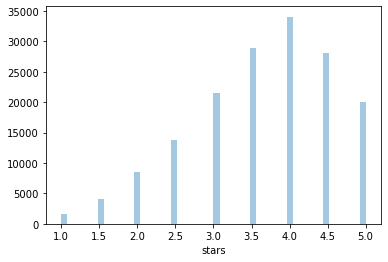

In [18]:
sns.distplot(df_bus.stars, kde=False)
plt.savefig('Distribution-of-stars.png')

Checking number of open and closed businesses using 'is_open' feature

In [13]:
df_bus['is_open'].value_counts()

1    123248
0     37337
Name: is_open, dtype: int64

In [14]:
#no. of businesses in a city
df_bus.city.value_counts()

Austin                22416
Portland              18203
Vancouver             13330
Atlanta               12612
Orlando               10637
                      ...  
Downtown Vancouver        1
Kissimmee,                1
Beacon Hill               1
BOSTON, HOTEL             1
acworth                   1
Name: city, Length: 836, dtype: int64

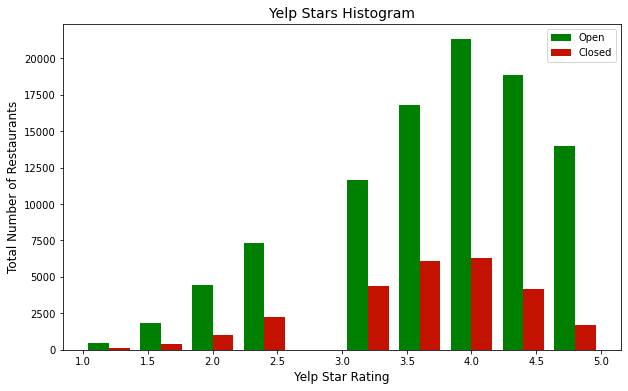

In [16]:
plt.figure(figsize=(10,6))
plt.hist([df_bus[df_bus['is_open']==1].dropna()['stars'].values,\
          df_bus[df_bus['is_open']==0].dropna()['stars'].values],\
        label=['Open','Closed'],color=['g','#c41200'])


plt.legend()
plt.title('Yelp Stars Histogram',fontsize=14)
plt.xlabel('Yelp Star Rating',fontsize=12)
plt.ylabel('Total Number of Restaurants',fontsize=12)
plt.savefig('Yelp-star-Histogram.png')

Scatterplot of 'latitude' and 'longitude'

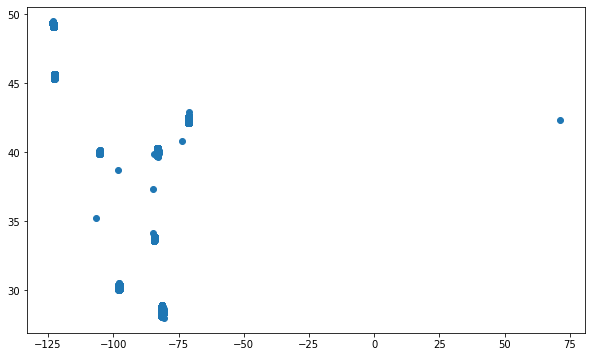

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_bus['longitude'], y=df_bus['latitude'])
plt.savefig(r'C:\Users\fahiy\Documents\Springboard\Final-Proj\pictures-yelp\Lat-long-scatterplot.png')
plt.show()

In [165]:
df_temp = df_bus[["latitude", "longitude","state", "city", "categories", "stars"]]

Checking for null values:

In [166]:
df_temp.isna().sum()

latitude        0
longitude       0
state           0
city            0
categories    115
stars           0
dtype: int64

We are going to drop the null business 'categories' since we cannot do the imputations for categories. 

In [167]:
df_temp.dropna(subset=['categories'],inplace=True)

<ipython-input-167-4fdcd56bbf93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(subset=['categories'],inplace=True)


In [168]:
df_temp.isna().sum()

latitude      0
longitude     0
state         0
city          0
categories    0
stars         0
dtype: int64

In [169]:
df_temp = pd.get_dummies(df_temp, columns=['state','city'])
df_temp.head()

,latitude,longitude,categories,stars,state_ABE,state_AL,state_AZ,state_BC,state_CA,state_CO,...,city_norwood,city_orlando,city_oviedo,city_portland,city_reading,city_stoneham,city_surrey,city_vancouver,city_wakefield,city_watertown
0,40.017544,-105.283348,"Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries",4.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,45.588906,-122.593331,"Salad, Soup, Sandwiches, Delis, Restaurants, Cafes, Vegetarian",4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.511907,-122.613693,"Antiques, Fashion, Used, Vintage & Consignment, Shopping, Furniture Stores, Home & Garden",4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.914482,-81.295979,"Beauty & Spas, Hair Salons",3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.747027,-84.353424,"Gyms, Active Life, Interval Training Gyms, Fitness & Instruction",4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Examining the "categories" feature to see what kind of data type that is:

In [170]:
type(df_temp['categories'][0])

str

##### We would like to break down the 'str' into a list for us to be able to do vectorize the texts later. 

In [171]:
category_0 = df_bus['categories'][0]
category_0

'Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries'

In [172]:
type(category_0)

str

In [173]:
#category_0 = df_bus['categories'][0]
#str.split(category_0,",")
#category_0_list = category_0.split(",")                                                                           # With split we use ',' as the delimiter and make a list of separate elements out of a string
#category_0_list

##### Getting rid of leading and trailing spaces and lowercasing the categories: 
We are defining functions to turn the different business categories into lowercase strings and t get rid of extra spaces

In [175]:
def str_to_list(category_str):
    return category_str.split(",")
def lower_strip_texts(category_list):
    return [i.lower().strip() for i in category_list]   
def str_lowered_stripped_list(category_str): # This is the combination of the first two functions
    temp = str_to_list(category_str)
    return lower_strip_texts(temp)    

In [177]:
categories_list = []
for catg in df_temp["categories"]:
    categories_list.append(str_lowered_stripped_list(catg)) # Calling the combination function
df_temp["categories"] = categories_list 
df_temp["categories"]

0         [gastropubs, food, beer gardens, restaurants, bars, american (traditional), beer bar, nightlife, breweries]
1                                                    [salad, soup, sandwiches, delis, restaurants, cafes, vegetarian]
2                         [antiques, fashion, used, vintage & consignment, shopping, furniture stores, home & garden]
3                                                                                        [beauty & spas, hair salons]
4                                                  [gyms, active life, interval training gyms, fitness & instruction]
                                                             ...                                                     
160580                                         [real estate, real estate services, home services, real estate agents]
160581                                                                [health markets, food, specialty food, grocery]
160582                                                  

Doing Count Vectorizing on the "categories" column

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = list, tokenizer = list)
df_temp_categories_vectors = vectorizer.fit_transform(df_temp["categories"])
df_temp_categories_vectors = pd.DataFrame(df_temp_categories_vectors.todense(), columns = vectorizer.get_feature_names())
df_temp_categories_vectors
#df_bus = pd.concat([df_bus,df_bus_categories_vectors], axis = 1)

,& probates,3d printing,acai bowls,accessories,accountants,acne treatment,active life,acupuncture,addiction medicine,adoption services,...,wine tours,wineries,women's clothing,workers compensation law,wraps,yakiniku,yelp events,yoga,ziplining,zoos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concatenating vectorized column with the rest of our df_temp dataFrame

In [181]:
df_temp = pd.concat([df_temp,df_temp_categories_vectors], axis = 1)
df_temp

,latitude,longitude,categories,stars,state_ABE,state_AL,state_AZ,state_BC,state_CA,state_CO,...,wine tours,wineries,women's clothing,workers compensation law,wraps,yakiniku,yelp events,yoga,ziplining,zoos
0,40.017544,-105.283348,"[gastropubs, food, beer gardens, restaurants, bars, american (traditional), beer bar, nightlife, breweries]",4.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.588906,-122.593331,"[salad, soup, sandwiches, delis, restaurants, cafes, vegetarian]",4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.511907,-122.613693,"[antiques, fashion, used, vintage & consignment, shopping, furniture stores, home & garden]",4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.914482,-81.295979,"[beauty & spas, hair salons]",3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.747027,-84.353424,"[gyms, active life, interval training gyms, fitness & instruction]",4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,30.272921,-97.744386,"[real estate, real estate services, home services, real estate agents]",4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160581,28.499836,-81.047478,"[health markets, food, specialty food, grocery]",4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,28.511615,-81.270020,"[arts & entertainment, paint & sip, art classes, education]",5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160583,45.529647,-122.685153,"[cuban, sandwiches, restaurants, cafes]",4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
model = LinearRegression()

In [183]:
X = df_temp[[c for c in df_temp.columns if c != 'stars']]

MemoryError: Unable to allocate 2.63 GiB for an array with shape (2199, 160585) and data type float64

In [ ]:
X.head()

In [ ]:
X.columns

In [ ]:
y = df_temp["stars"]

In [184]:
model.fit(X,y)

NameError: name 'X' is not defined

In [32]:
model.coef_

array([ 1.40919872e-01, -4.96280150e-03,  1.16158351e+00, -1.15774873e+00,
        8.12935592e-01,  2.63529439e-01,  3.63536638e-01, -7.37305410e-02,
        1.66559145e+00,  9.30433892e-01, -4.87160167e-01, -9.08577764e-01,
        7.73041567e-01,  9.38776821e-01, -8.21182049e-01, -6.88476985e-01,
        1.17188745e+00,  9.77464513e-01, -1.74690596e+00, -1.35334445e-01,
       -1.52300333e+00, -8.36694881e-01,  1.51661130e-01,  7.21494931e-01,
        9.79065187e-02,  1.83817386e-01, -5.94595718e-01,  1.90154443e-01,
        2.04971427e-01, -1.03080981e+00,  8.33618420e-01, -2.58957617e-01,
       -1.17922713e+00,  3.17130538e-01,  1.34798332e+00,  1.30031698e+00,
       -4.38536868e-01,  1.07922699e+00,  2.36525467e+00,  2.34778958e+00,
       -1.71241431e+00, -1.25555789e+00,  2.85790395e+00,  1.27818717e+00,
        2.59792958e+00,  2.84451874e+00, -6.53336362e-01,  1.84807853e+00,
        1.84775932e+00,  1.82085915e+00,  2.84737737e+00,  2.34781730e+00,
        2.84749905e+00,  

In [33]:
pd.options.display.max_rows = 1000

In [34]:
len(model.coef_)

869

In [35]:
coeffs = pd.Series(model.coef_, index = X.columns)
coeffs.sort_values()

city_Vanvouver                             -4.570374
city_PORT COQUITLAM                        -4.012655
city_REVERE                                -3.694972
city_BOSTON LOGAN AP                       -3.691050
city_Oak Square                            -3.689400
city_VANCOUVER DT (BC)                     -3.515802
city_Phoenix                               -3.415673
city_Pinehurst                             -3.216058
city_BOSTON, HOTEL                         -3.192088
city_Jeffries Point / Airport              -3.190556
city_newton                                -3.190256
city_BrIghton                              -3.187024
city_S. Boston                             -3.186471
city_Nantasket Beach                       -3.179480
city_Castle Rock                           -3.066485
city_Vancouver BC                          -3.014759
city_Greater Vancouver Area                -3.013855
city_Cloverdale                            -3.013002
city_RICHMOND                              -2.

In [36]:
coeffs = pd.Series(model.coef_, index = X.columns)
top_5 = coeffs.sort_values().tail()
top_5.round(1)

city_Winter Garden Fl     3.4
city_Northeast Orlando    3.4
city_Orlando Florida      3.4
city_Dr. Phillips         3.4
city_Beuna Vista          3.4
dtype: float64

In [37]:
low_5 = coeffs.sort_values().head()
low_5.round(1)

city_Vanvouver         -4.6
city_PORT COQUITLAM    -4.0
city_REVERE            -3.7
city_BOSTON LOGAN AP   -3.7
city_Oak Square        -3.7
dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.Series(y_train)
y_train.name = y.name
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((128468, 869), (32117, 869), (128468,), (32117,))

In [39]:
hyperp_table = []
print(len(hyperp_table))
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)
results = {} #creating an empty dictionary which, later will feed into the hyper parameter table(a list)
results['rmse_train'] = ((y_pred_train - y_train)**2).mean()**.5
results['rmse_test'] = ((y_pred_test - y_test)**2).mean()**.5
results['model'] = linear_model.__class__.__name__#We are changing how we are creating 'results' so that 
#it's already a string. If we add dunder.name__(dunder_)
results['feature_names'] = ",".join(list(X.columns))
hyperp_table.append(results)
json.dump(hyperp_table, open("hyperp_table.json", 'w'), indent=2)
hyperp_table

0


[{'rmse_train': 0.9225948524962932,
  'rmse_test': 0.9700924273837233,
  'model': 'LinearRegression',
  'feature_names': 'latitude,longitude,state_ABE,state_AL,state_AZ,state_BC,state_CA,state_CO,state_DC,state_DE,state_FL,state_GA,state_HI,state_IL,state_KS,state_KY,state_MA,state_ME,state_MI,state_MN,state_NC,state_NH,state_NM,state_NY,state_OH,state_OK,state_ON,state_OR,state_TX,state_VA,state_WA,state_WI,state_WY,city_51 Richard Beall Hwy 17-92,city_ALTAMONTE SPRINGS,city_ATLANTA,city_AUBURNDALE,city_AUSTIN,city_Alafaya,city_Alamonte Springs,city_Allston,city_Aloha,city_Aloma,city_Alpharetta,city_Altamonte,city_Altamonte  springs,city_Altamonte Spg,city_Altamonte Sprin,city_Altamonte Spring,city_Altamonte Springs,city_Altamonte Springs ,city_Altamonte Springs Orlando,city_Altamonte Springs, Florida,city_Altanta,city_Alton,city_Amlin,city_Andover,city_Anmore,city_Apopka,city_Arling-n,city_Arlington,city_Arlington Heights,city_Arvada,city_Ashland,city_Ashville,city_Atalanta,city_Atla

In [50]:
descriptions = pd.Series([
    "RMSE value with feature 'latitude'",
    "RMSE value with feature 'latitude,longitude"
    "RMSE value with feature 'latitude,longitude,state,city",    
    ])
descriptions

0                                                                   RMSE value with feature 'latitude'
1    RMSE value with feature 'latitude,longitudeRMSE value with feature 'latitude,longitude,state,city
dtype: object

In [48]:
df_hyper = pd.DataFrame(hyperp_table)
df_hyper.sort_values('rmse_test')

,rmse_train,rmse_test,model,feature_names
0,0.922595,0.970092,LinearRegression,"latitude,longitude,state_ABE,state_AL,state_AZ,state_BC,state_CA,state_CO,state_DC,state_DE,state_FL,state_GA,state_HI,state_IL,state_KS,state_KY,state_MA,state_ME,state_MI,state_MN,state_NC,state_NH,state_NM,state_NY,state_OH,state_OK,state_ON,state_OR,state_TX,state_VA,state_WA,state_WI,state_WY,city_51 Richard Beall Hwy 17-92,city_ALTAMONTE SPRINGS,city_ATLANTA,city_AUBURNDALE,city_AUSTIN,city_Alafaya,city_Alamonte Springs,city_Allston,city_Aloha,city_Aloma,city_Alpharetta,city_Altamonte,..."


In [49]:
df_hyper["desc"] = descriptions
df_hyper.head(15)

,rmse_train,rmse_test,model,feature_names,desc
0,0.922595,0.970092,LinearRegression,"latitude,longitude,state_ABE,state_AL,state_AZ,state_BC,state_CA,state_CO,state_DC,state_DE,state_FL,state_GA,state_HI,state_IL,state_KS,state_KY,state_MA,state_ME,state_MI,state_MN,state_NC,state_NH,state_NM,state_NY,state_OH,state_OK,state_ON,state_OR,state_TX,state_VA,state_WA,state_WI,state_WY,city_51 Richard Beall Hwy 17-92,city_ALTAMONTE SPRINGS,city_ATLANTA,city_AUBURNDALE,city_AUSTIN,city_Alafaya,city_Alamonte Springs,city_Allston,city_Aloha,city_Aloma,city_Alpharetta,city_Altamonte,...",RMSE value with feature 'latitude'
